<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.7/546.7 kB 7.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/tradevesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2025-01-01 13:01:28
-------------------
qualified stocks: 88
with latest results: 84
still star stocks: 42
-------------------
Initial Investment:  1.03 C
CY Investment:  1.16 C
Reserve:  3.10 K
Current:  1.19 C
-------------------
Today PnL: 1.19 L (1.01%)
Current PnL: -7.72 L (-6.64%)
CY Booked + Current PnL: 2.94 L (2.54%)
-------------------
Total profit:  5.79 L
Total loss:  -13.50 L
-------------------
Total Booked + Current PnL: 16.05 L (15.58%)
Total Booked PnL: 23.77 L (23.07%)
Curr Year Booked PnL: 10.66 L (8.93%)
Prev Year Booked PnL: 13.11 L (12.73%)
Est FTT:  1.91 C
Est FTT PnL: 71.38 L (59.82%)
-------------------
Est LTT:  2.47 C
Est LTT PnL: 1.28 C (107.11%)
Deployed:  1.03 C
Current:  1.19 C
CAGR/XIRR %: 12.93%


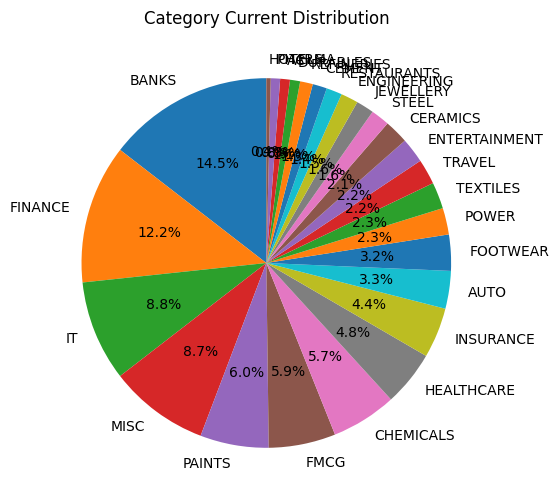

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [4]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
12,BANKBARODA,195.74,283.00,-23.74,M,56.82,94978.0,17661.0,16811.0,-0.04,22.84,17.70,44.58,19.0,1.05,0.80,11.13,XR,NTT,BANKS
79,TEAMLEASE,2557.47,3487.00,-6.39,M,93.18,126252.0,18838.0,20200.0,2.56,17.54,16.00,36.35,9.0,0.93,1.06,12.82,X40N,NTT,MISC
15,BAYERCROP,4346.57,6836.59,19.54,H,32.95,88759.0,19214.0,20628.0,-0.06,27.63,23.24,57.29,21.0,0.93,0.74,13.63,X40N,ATH,CHEMICALS
47,LALPATHLAB,2519.90,3690.00,-12.27,H,75.00,109044.0,18328.0,23793.0,0.95,20.20,21.82,46.43,19.0,0.77,0.91,51.51,X40N,NTT,HEALTHCARE
44,JUBLFOOD,487.35,850.00,2.62,M,96.59,163946.0,54780.0,26461.0,1.92,50.18,16.14,74.41,28.0,2.07,1.37,70.17,AR,NTT,RESTAURANTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,SAIL,130.64,228.00,52.39,M,38.64,194638.0,-30324.0,197986.0,-0.09,-13.48,101.72,74.53,6.0,-0.15,1.63,5.52,XY24,BTT,STEEL
58,RBLBANK,230.61,388.00,-41.68,M,82.95,160579.0,-73721.0,233626.0,0.03,-31.46,145.49,68.25,-50.0,-0.32,1.35,3.90,XY24,NTT,BANKS
11,BANDHANBNK,217.54,400.00,-43.14,M,20.45,174928.0,-63713.0,263879.0,0.25,-26.70,150.85,83.87,-25.0,-0.24,1.47,0.29,XY24,NTT,BANKS
75,TANLA,991.56,2007.31,-35.38,M,87.50,160899.0,-58236.0,282716.0,8.32,-26.58,175.71,102.44,-32.0,-0.21,1.35,9.53,AR,ATH,IT


In [5]:
# lower current allocation with minimal upside
tmp_df = df_portfolio_features[(df_portfolio_features['CurrAlloc%'] < 1) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
12,BANKBARODA,195.74,283.00,-23.74,M,56.82,94978.0,17661.0,16811.0,-0.04,22.84,17.70,44.58,19.0,1.05,0.80,11.13,XR,NTT,BANKS
15,BAYERCROP,4346.57,6836.59,19.54,H,32.95,88759.0,19214.0,20628.0,-0.06,27.63,23.24,57.29,21.0,0.93,0.74,13.63,X40N,ATH,CHEMICALS
47,LALPATHLAB,2519.90,3690.00,-12.27,H,75.00,109044.0,18328.0,23793.0,0.95,20.20,21.82,46.43,19.0,0.77,0.91,51.51,X40N,NTT,HEALTHCARE
70,SIS,477.00,528.00,72.43,M,60.23,62178.0,-18912.0,27582.0,1.34,-23.32,44.36,10.69,-21.0,-0.69,0.52,1.34,X40N,NTT,MISC
19,CERA,9059.90,10420.45,-1.89,H,86.36,75920.0,-14679.0,28280.0,0.07,-16.20,37.25,15.02,-51.0,-0.52,0.64,15.26,X40N,ATH,CERAMICS
76,TATAELXSI,7332.28,9000.00,-13.80,H,72.73,94149.0,-8503.0,31851.0,-1.05,-8.28,33.83,22.74,-5.0,-0.27,0.79,5.50,X40N,NTT,IT
81,TRIDENT,37.35,48.00,72.29,M,69.32,83338.0,-8916.0,35219.0,0.90,-9.67,42.26,28.51,-11.0,-0.25,0.70,7.93,XR,NTT,TEXTILES
48,LAOPALA,369.40,464.00,-14.46,M,35.23,88042.0,-12804.0,38633.0,1.32,-12.70,43.88,25.61,-41.0,-0.33,0.74,9.72,AR,NTT,CERAMICS
51,MASFIN,326.60,401.09,-26.43,M,67.05,81660.0,-16320.0,38666.0,-1.13,-16.66,47.35,22.81,-74.0,-0.42,0.68,3.70,XR,ATH,FINANCE
83,UJJIVANSFB,59.50,60.00,-37.36,M,62.50,57800.0,-43350.0,44200.0,0.56,-42.86,76.47,0.84,-25.0,-0.98,0.48,5.46,X40N,NTT,BANKS


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'] == 'XY24') ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
42,JIOFIN,320.24,387.0,-8.76,M,14.77,150176.0,-8023.0,40998.0,1.77,-5.07,27.30,20.85,65.0,-0.20,1.26,29.64,XY24,BTT,FINANCE
18,CAMPUS,294.86,393.0,3.70,M,95.45,181426.0,13651.0,42200.0,-1.21,8.14,23.26,33.28,18.0,0.32,1.52,48.65,XY24,NTT,FOOTWEAR
84,UNIONBANK,123.87,163.0,-10.18,M,84.09,138180.0,-2660.0,47147.0,0.96,-1.89,34.12,31.59,-20.0,-0.06,1.16,12.28,XY24,NTT,BANKS
28,GICRE,335.06,583.0,16.72,M,97.73,201064.0,54643.0,53704.0,3.57,37.32,26.71,74.00,137.0,1.02,1.69,55.42,XY24,BTT,INSURANCE
54,NHPC,82.08,115.0,192.99,M,77.27,140601.0,-412.0,56972.0,1.43,-0.29,40.52,40.11,-85.0,-0.01,1.18,24.02,XY24,NTT,POWER
23,DABUR,518.36,735.0,-9.19,H,55.68,130292.0,-1890.0,57133.0,0.78,-1.43,43.85,41.79,-3.0,-0.03,1.09,4.16,XY24,BTT,FMCG
52,MEDANTA,1022.60,1486.0,-0.80,M,78.41,168028.0,12593.0,57835.0,2.50,8.10,34.42,45.32,30.0,0.22,1.41,17.03,XY24,NTT,HEALTHCARE
7,ATULAUTO,624.44,844.0,-11.41,M,63.64,138343.0,-9025.0,60843.0,1.28,-6.12,43.98,35.16,-37.0,-0.15,1.16,23.23,XY24,NTT,AUTO
43,JPPOWER,18.73,26.2,-62.50,L,52.27,136390.0,-5452.0,62017.0,1.75,-3.84,45.47,39.88,85.0,-0.09,1.14,20.47,XY24,NTT,POWER
69,SHALBY,261.39,327.0,60.15,M,73.86,161379.0,-19764.0,65229.0,1.40,-10.91,40.42,25.10,-25.0,-0.30,1.35,10.58,XY24,NTT,HEALTHCARE


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
12,BANKBARODA,195.74,283.00,-23.74,M,56.82,94978.0,17661.0,16811.0,-0.04,22.84,17.70,44.58,19.0,1.05,0.80,11.13,XR,NTT,BANKS
44,JUBLFOOD,487.35,850.00,2.62,M,96.59,163946.0,54780.0,26461.0,1.92,50.18,16.14,74.41,28.0,2.07,1.37,70.17,AR,NTT,RESTAURANTS
81,TRIDENT,37.35,48.00,72.29,M,69.32,83338.0,-8916.0,35219.0,0.90,-9.67,42.26,28.51,-11.0,-0.25,0.70,7.93,XR,NTT,TEXTILES
48,LAOPALA,369.40,464.00,-14.46,M,35.23,88042.0,-12804.0,38633.0,1.32,-12.70,43.88,25.61,-41.0,-0.33,0.74,9.72,AR,NTT,CERAMICS
51,MASFIN,326.60,401.09,-26.43,M,67.05,81660.0,-16320.0,38666.0,-1.13,-16.66,47.35,22.81,-74.0,-0.42,0.68,3.70,XR,ATH,FINANCE
36,IEX,133.39,219.00,-2.34,M,81.82,201577.0,52314.0,43480.0,-0.90,35.05,21.57,64.18,28.0,1.20,1.69,36.67,XR,NTT,MISC
38,INDUSINDBK,1354.50,1800.00,-35.28,M,59.09,55279.0,-21928.0,47324.0,1.01,-28.40,85.61,32.89,-21.0,-0.46,0.46,4.34,XR,NTT,BANKS
17,BSOFT,628.85,844.81,-1.98,M,34.09,98691.0,-11358.0,49148.0,0.64,-10.32,49.80,34.34,-22.0,-0.23,0.83,3.40,XR,ATH,IT
24,DEN,52.79,75.00,-20.85,L,49.43,69984.0,-14480.0,50018.0,0.23,-17.14,71.47,42.07,-18.0,-0.29,0.59,8.48,AR,NTT,ENTERTAINMENT
20,CLEAN,1389.74,2137.00,-3.47,H,98.86,122217.0,8258.0,53018.0,4.73,7.25,43.38,53.77,2.0,0.16,1.02,16.82,XR,NTT,CHEMICALS


In [8]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.63
1,20,34.33
2,30,47.78


In [9]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,41.10
X40,19.85
X40N,14.96
XR,14.56
AR,6.65
SR,1.43
X200,1.42


In [10]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,14.52,-10.20,62.37
FINANCE,12.15,-12.57,59.97
IT,8.79,-6.11,59.44
MISC,8.74,2.74,33.23
PAINTS,5.99,-15.08,49.14
FMCG,5.85,-4.97,45.87
CHEMICALS,5.71,-6.13,73.16
HEALTHCARE,4.83,9.68,37.48
INSURANCE,4.41,7.86,41.84


In [11]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,2753501.0
XR,1814823.0
X40N,897669.0
X40,840339.0
AR,608532.0
SR,175065.0
X200,48415.0


In [12]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
M,4574502.0
H,1642914.0
L,920928.0


In [13]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Conviction', 'Criteria'])['FTT Amt'].sum().sort_values(ascending=False)

Conviction  Criteria
M           XY24        2401364.0
            XR           864198.0
L           XR           808893.0
H           X40          782147.0
M           X40N         574799.0
            AR           500884.0
H           X40N         322870.0
            XY24         290120.0
M           SR           175065.0
H           XR           141732.0
L           XY24          62017.0
M           X40           58192.0
H           AR            57630.0
L           AR            50018.0
H           X200          48415.0
Name: FTT Amt, dtype: float64

In [14]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M,55
H,28
L,5
